# Product Sales Analysis Using Python Pandas and Python Matplotlib


Here I took the advantage of Python Pandas & Python Matplotlib to analyze and answer real world business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

Let me explain how I took this data and performed some real world data analysis to this particular sales data.

Firstly I imported all the libraries that are necessary to perform tasks.

After importing the necessary libraries I read the data and it has 12 months of data so I merged them into one single data set and performed all the operations accordingly.

I started by cleaning data. Tasks that were included during that particular section:
- Drop NaN values from DataFrame
- Removing rows based on a condition
- Change the type of columns (to_numeric, to_datetime, astype)

Once I have cleaned up our data a bit, I moveed to data exploration section. In this section I explore 6 high level business questions that were related to our data:
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?
- What product sold the most in each month?

To answer these questions I went through many different pandas & matplotlib methods. They include:
- Concatenating multiple csvs together to create a new DataFrame (pd.concat)
- Adding columns
- Parsing cells as strings to make new columns (.str)
- Using the .apply() method
- Performed some statistical operation by using .mean()
- Using groupby to perform aggregate analysis
- Plotting bar charts and lines graphs to visualize our results
- Labeling our graphs

## Import necessary Libraries

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import os 

## Merging 12 Months of sales data into a single file

In this section what I did basically, I read the CSV file and came to a conculsion that the sales data has 12 Months of data in different files. So I performed some operations to merge them into one single file.

In [2]:
# read the csv file
df = pd.read_csv("./Product_Sales_Data/Sales_April_2019.csv")

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Files list directory 

I took the reference from stackoverflow to list the files in that particular directory

https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

In [4]:
# storing all the files as a list in that directory into files variable
files = [file for file in os.listdir('./Sales_Data')]

# printing all the files using for loop
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


Here I took the advantage of the method called ```.listdir()``` which is present in ```os``` module. what it does means it take the path of a directory and list the files which are present in that direcory

## Files Concatenate

To merge the files into one files we need a method called ```.concat()``` Basically what it does is, It takes a file as an input like a path and it concatenate with the main file which I gave as an argument to it. 

To know more about this method the source link is
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [5]:
# created a empty dataframe
all_months_data = pd.DataFrame()

# running all files and contactinating
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
# printing all months dataset
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Firstly I created a dataframe called ```all_months_data``` using pands dataframe. After that using for loop read and concatenated all the files into one file and stored that into the empty dataframe which is created before that is ```all_months_data```

In [6]:
# Converting file into CSV
all_months_data.to_csv("all_data.csv", index=False)

Here I converted all the data into csv using ```to_csv()``` method and ```index=False``` because I don't want index again inside my dataset

In [7]:
# Reading the new data
all_data = pd.read_csv("./all_data.csv")

In [8]:
# printing sample data
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
117328,173525,Lightning Charging Cable,1,14.95,03/22/19 12:12,"666 Pine St, Atlanta, GA 30301"
17795,193535,Apple Airpods Headphones,1,150,04/30/19 19:06,"866 West St, Seattle, WA 98101"
158058,262475,AAA Batteries (4-pack),2,2.99,10/23/19 22:49,"829 Wilson St, San Francisco, CA 94016"
28080,245946,AAA Batteries (4-pack),2,2.99,08/26/19 11:14,"737 Jackson St, Seattle, WA 98101"
153711,294643,USB-C Charging Cable,1,11.95,11/14/19 16:35,"77 Cherry St, San Francisco, CA 94016"


# Clean up the data

## Drop Rows of NaN

To find or drop the NaN values we use ```.isnan()``` and ```.dropna()``` methods respectively.

In [9]:
# performing isnan() method to the data
nan_df = all_data[all_data.isna().any(axis=1)]

#printing nan_df
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# dropping all the NaN values inside the dataframe
all_data = all_data.dropna(how='all')

# printing all_data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Here in my dataset there are some NaN values so I performed ```.isnan()``` method to know where the NaN are present after that I took the advantage of using the ```.dropna()``` method the ```nan_df()``` method to my ```all_data``` dataframe.

To know more about clearing NaN values inside a dataframe here is the source link
https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe

## Cleaning up the default values 

After droping off the NaN values there were some rows whichs are filled with default values which is shown below like Order Id is equal to Order ID and Product is equal to Product and so on..

In [11]:
# created a new dataframe called temp_df to store all the data which has default values
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']

# printing the temp_df
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


To remove the default values firstly we need to access a row value here I choose the ```all_data['Order Date']``` as a column and based on that we can remove all the data which starts with 'Or' at the Order Date column

To access the first two letters of a string I used ```.str[0:2]``` operation and stored all the data into ```all_data``` dataframe.


In [12]:
# removing all the rows with Order Date starts with 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

# printing the dataframe
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Covert columns to the correct type

In this sales data there are some columns with type of string and to perform some certain numeric operations we need to convert it to numerical values.

To convert the columns into right data type there is a method in pandas called ```.to_numeric()``` it takes particular coloumn as an input and converts it into interger or float based the data which is present in that column.

In [13]:
# coverted all the string values to integers and float values
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

# printing the dateframe
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Data is same as before but the values inside these columns ```all_data['Quantity Ordered']``` and ```all_data['Price Each']``` coverted into integer and float values respectively. 

In ```all_data['Quantity Ordered']``` there are all integer values and in this case ```all_data['Price Each']``` there are float values.

## Question 1: What was the best month for sales? How much was earned that month?

to solve we need month and sales column
to get sales -> Quantity ordered * Price Each

### Add Month column

In [14]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [15]:
all_data['Month'] = all_data['Month'].astype('int')
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
162017,266265,Vareebadd Phone,1,400.00,10/26/19 12:59,"449 Maple St, New York City, NY 10001",10
132208,205237,AAA Batteries (4-pack),4,2.99,05/11/19 12:52,"871 Jefferson St, Atlanta, GA 30301",5
130526,203616,AAA Batteries (4-pack),3,2.99,05/25/19 06:11,"666 Madison St, Atlanta, GA 30301",5
120661,194254,AAA Batteries (4-pack),1,2.99,05/13/19 13:17,"899 Main St, San Francisco, CA 94016",5
102040,219835,Lightning Charging Cable,1,14.95,06/29/19 15:34,"860 River St, Los Angeles, CA 90001",6


### Add a sales column

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [17]:
results = all_data.groupby('Month').sum()

results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### December month is the best month for sales and the january stands at last

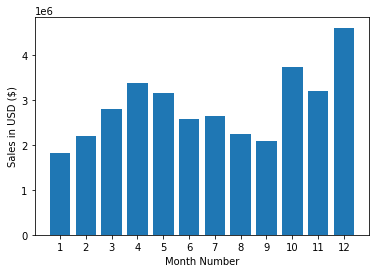

In [18]:
months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')

plt.show()

### December christmas time and april maybe more money on advertising 

## Question 2: What city had the highest number of sales

### Add a city column

### Let's use ```.apply()``` 

In [19]:
def get_city(address):
    return address.split(',')[1] #by using index 1 splitted the address

def get_state(address):
    return address.split(',')[2].split(' ')[1] # to get the city with state and get rid of the pin code

all_data['City Name'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ') ')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
results = all_data.groupby('City Name').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City Name,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


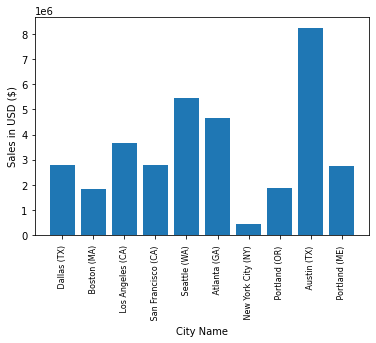

In [21]:
cities = all_data['City Name'].unique()

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')

plt.show()

based on the table san fransico is the best city in sales but when it comes to plot it showing it as a austin

x data and y data are not in the same order

it should be in same order

to fix this use the list comprehension

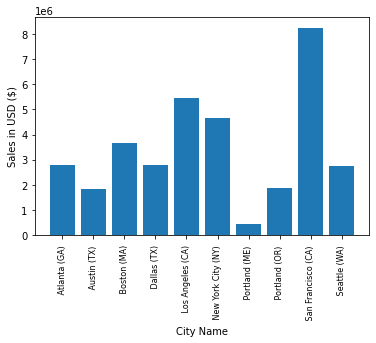

In [22]:
cities = [city for city,df in all_data.groupby('City Name')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')

plt.show()

sillicon valley more need electronics 

tech to advertise is more in san francisco

people has more money in san fransisco 

maybe there is less add advest in portland and less investment in that particular season

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## converting Order Date into Date Time object

In [24]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [26]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [27]:
hours = [hour for hour,df in all_data.groupby('Hour')]

results = all_data.groupby(['Hour']).count()

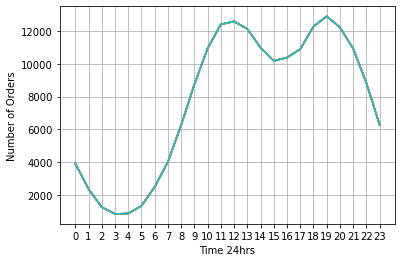

In [28]:
plt.plot(hours, results)
plt.xticks(hours)
plt.grid()
plt.xlabel('Time 24hrs')
plt.ylabel('Number of Orders')

plt.show()

To place an ad around 11am and 7pm is the good time to display ads

and this chart is for every city combined 

# Question 4: What product are most often sold together?

based on order ID -> if same Order id then we can find the order together

find the duplicate order ID's and combine them by group

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [30]:
order_id_df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [31]:
order_id_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49


In [32]:
order_id_df['Grouped Products'] = order_id_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

order_id_df.head()

C:\Users\VRaj\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Hour,Minute,Grouped Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


### drop of the duplicated order id

In [33]:
grouped_df = order_id_df[['Order ID', 'Grouped Products']].drop_duplicates()

grouped_df.head()

,Order ID,Grouped Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [34]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter 

items_together = 2 # if we change the number we get the no. of items that are sold together

count = Counter()

for row in grouped_df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, items_together)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


by seeing the above data we can promote the lighting cable with an iphone. we can repreat the pairs with other also

we can also offer some deals with that correspounding product

# Question 5: What product sold the most? Why do you think it sold the most?

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [36]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group['Quantity Ordered'].sum()
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [37]:
products = [product for product, df in product_group]

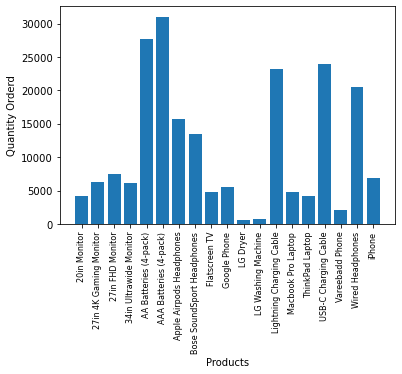

In [38]:
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Orderd')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

3 Most sold Items AAA Batteries, AA Batteries and USB-C charging cable

those items are cheap




In [39]:
prices = all_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

C:\Users\VRaj\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


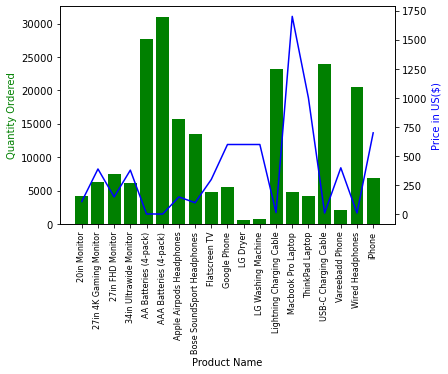

In [40]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in US($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

if the price and quatity corelate we can prove over hypothesis whenever the quantity orderd is high the price of that product should be low.


based on the chart we can say AAA and AA batteries are cheap so the quantity purchased is high. when it comes to LG Dryer and Washing machine it is damn expensive so it is low in ordered


MacbookPro and thinkpad Laptop are expensive but we can see the sales are good enough maybe people are more willing to buy laptops rather than LG dryer and LG washing machine maybe the people who bought the laptops are students


# Question 6: What product sold the most in each month?

In [41]:
all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Hour,Minute
171209,275021,Lightning Charging Cable,1,14.95,2019-10-15 21:59:00,"853 Maple St, New York City, NY 10001",10,14.95,New York City (NY),21,59
89322,234445,USB-C Charging Cable,1,11.95,2019-07-03 12:04:00,"840 Cherry St, Seattle, WA 98101",7,11.95,Seattle (WA),12,4
98090,216053,iPhone,1,700.00,2019-06-03 20:34:00,"777 13th St, Austin, TX 73301",6,700.00,Austin (TX),20,34
73100,146516,Apple Airpods Headphones,1,150.00,2019-01-14 15:24:00,"827 Lake St, New York City, NY 10001",1,150.00,New York City (NY),15,24
37736,302672,Bose SoundSport Headphones,1,99.99,2019-12-07 23:33:00,"363 Center St, Boston, MA 02215",12,99.99,Boston (MA),23,33
15360,191207,AA Batteries (4-pack),4,3.84,2019-04-04 18:08:00,"811 Adams St, Boston, MA 02215",4,15.36,Boston (MA),18,8
40302,305110,27in FHD Monitor,1,149.99,2019-12-27 19:45:00,"601 Center St, Los Angeles, CA 90001",12,149.99,Los Angeles (CA),19,45
83216,228597,Wired Headphones,1,11.99,2019-07-07 15:29:00,"8 8th St, New York City, NY 10001",7,11.99,New York City (NY),15,29
121422,194977,Bose SoundSport Headphones,1,99.99,2019-05-21 19:34:00,"623 Sunset St, San Francisco, CA 94016",5,99.99,San Francisco (CA),19,34
93068,211276,20in Monitor,1,109.99,2019-06-20 08:50:00,"144 Hill St, New York City, NY 10001",6,109.99,New York City (NY),8,50


In [42]:
april_df = all_data[all_data['Month'] == 10]
april_df.sample(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Name,Hour,Minute
164568,268688,USB-C Charging Cable,1,11.95,2019-10-24 09:11:00,"956 13th St, Portland, ME 04101",10,11.95,Portland (ME),9,11
164285,268423,Wired Headphones,1,11.99,2019-10-19 11:21:00,"366 Maple St, Seattle, WA 98101",10,11.99,Seattle (WA),11,21
156974,261446,20in Monitor,1,109.99,2019-10-16 19:22:00,"378 Park St, New York City, NY 10001",10,109.99,New York City (NY),19,22
165984,270048,AAA Batteries (4-pack),1,2.99,2019-10-04 22:37:00,"669 Jackson St, Seattle, WA 98101",10,2.99,Seattle (WA),22,37
160037,264363,AAA Batteries (4-pack),1,2.99,2019-10-06 11:49:00,"13 14th St, Atlanta, GA 30301",10,2.99,Atlanta (GA),11,49
164628,268743,Wired Headphones,1,11.99,2019-10-30 18:54:00,"372 14th St, Boston, MA 02215",10,11.99,Boston (MA),18,54


In [43]:
april_sales_df = april_df.groupby(april_df['Product']).sum()
april_sales_df

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,429,47075.72,4280,47185.71,6058,12377
27in 4K Gaming Monitor,723,280402.81,7190,281962.77,10315,21127
27in FHD Monitor,791,118492.10,7900,118642.09,11107,22792
34in Ultrawide Monitor,671,254593.30,6700,254973.29,9765,20334
AA Batteries (4-pack),2940,8605.44,22410,11289.60,32488,67492
AAA Batteries (4-pack),3363,6694.61,22390,10055.37,32076,66678
Apple Airpods Headphones,1671,249300.00,16620,250650.00,23605,48925
Bose SoundSport Headphones,1465,143985.60,14400,146485.35,20585,42209
Flatscreen TV,524,156900.00,5230,157200.00,7457,14599


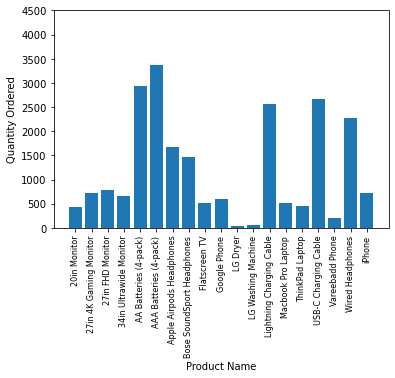

In [44]:
products = [product for product,df in april_sales_df.groupby('Product')]

plt.bar(products, april_sales_df['Quantity Ordered'] )
plt.xticks(products, rotation = 'vertical', size = 8)
plt.ylim([0, 4500])
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')

plt.show()

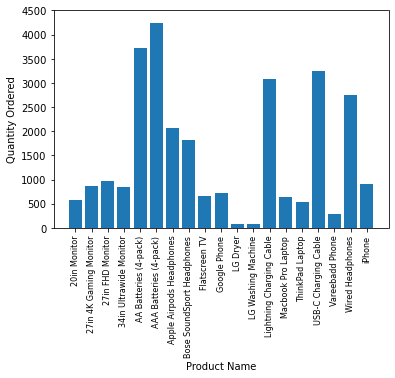

In [45]:
month_df = all_data[all_data['Month'] == 12]

month_sales_df = month_df.groupby(month_df['Product']).sum()

products = [product for product,df in month_sales_df.groupby('Product')]

plt.bar(products, month_sales_df['Quantity Ordered'] )
plt.xticks(products, rotation = 'vertical', size = 8)
plt.ylim([0, 4500])
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')

plt.show()

